## Chapter 3:  Introduction to Optimization

Author: [Christopher Monterola](https://www.chrismonterola.net)

Copyright © 2018 Christopher Monterola. All rights reserved.

This notebook was written, conceptualized, and prepared for the Mathematics for Data Science course under AIM's MS in Data Science program. None of the content here shall be reproduced and/or distributed without the written permission of the author. 

The author would like to acknowledge the AIM MSDS program team members for their help and support in building the notebooks. 


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.

---

## Executive Summary

Optimization cuts across many fields and is one of the most common analytics problems encountered in industries, government agencies, and other organizations/stakeholders. Optimization, loosely defined, is when you look for the optimal, i.e., maximum or minimum, solution (or setup or configuration) to a given problem or system. For example, to decongest a train system, you may try to optimize the number of trains deployed considering, of course, the cost. Other examples in industries and functional areas from corporate finance, investments, production, distribution, purchasing to human resources can be [sourced here](https://www.solver.com/examples-optimization-problems).

Optimization is arguably the single most important concept in engineering and the natural sciences. For example, one can demonstrate  concepts such as a particle's trajectory (derivable using Newton's Laws of Motion) or even the trajectory of light (say, refraction) as mere consequences of minimizing the travel time of light or the particle as it moves through a given medium. In biology, protein folding or the structure formed by the reconfiguration of amino acids is a consequence of minimizing the energy associated with the interaction of amino acids. Humans walk or run while kangaroos hop because these are the most energy efficient motion for our body structures.

In management, innovation, and governance, we now talk of the triple bottom line in assuring sustainability. The idea is to optimize the combination of **Profit, People, and Planet**.

By keeping in mind that, in the grand scheme of things, something is conserved, minimized, or maximized improves one's intuition on how to accurately understand a system and its mechanisms as exhibited or revealed in the data coming from the system. Note that a mechanism-based understanding of a system allows one to go beyond predictive analytics as it now allows you to have control over a system's dynamics by tuning, for example, certain parameters in the system, which allows you to explore *"what-if"* scenarios.

The goal of this lecture/notebook is to provide a general introduction needed to attack an optimization problem. As mentioned above, optimization can mean finding the maxima or minima of a given system subject to constraints. The notebook also provides a general introduction to the most basic methodology in optimization known as gradient-descent method. GD is at the core of most learning algorithms, including artificial neural networks (e.g. convolutional NN, recurrent NN, etc.). 

<div class="alert alert-block alert-info">

Lessons that can be learned in this notebook:

1. Understand the basic principles of optimization.
3. Implement Newton's method.
2. Implement Gradient Descent method.

</div>

This lesson will only serve as an introduction to the optimization angle. In the last part of this course, we will revisit this idea and couple it with the expectation that you would be more equipped in mathematics and programming  to deal with variants of constrained optimization (e.g. Lagrange equations).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### A Square is An Optimized Rectangle

#### Example 1. 

Suppose you were given a wire and asked to form a rectangle with perimeter $P$ such that you will also produce the maximum enclosed area $A$.

What are the best values for length $l$ and width $w$? 

The answer is a square with $l = w = \frac{P}{4}$.

Let's solve this problem using two approaches, both equally acceptable.  One is based on crunching all possible combinations and the other is based on calculus. 

We start by identifying the cost function of the problem which is $A = l w$.

**Solution 1.** *Numerical Solution*. 

We can cast the problem by finding all the possible ranges of $l$ and $w$ that will maximize $A$ noting that $P= 2l + 2w$. Without loss of generality, we can assume that $P=4$ then run simulations for $l$ from 0 to 2 (maximum possible length is 2) where $l$ is related to $w$ by $2l + 2w = P =4$. Hence, $w$ is constrained to be $w=2-l$. Shown below is the resulting area for every combination of $l$ and $w$.

In [2]:
# Set initial length to 0
L = 0

# Run length from 0 to 2
L_max = 2

# Define width as a function of the current length and max length
def W(L_max, L):
    return L_max - L

# Increment of length (how finely we want to search)
step_size = 0.1 

while L < L_max:
    prev_L = L
    A = L*W(L_max, prev_L) # Area of the rectangle
    print("length = %.2f --" %L,"-- width = %.2f --" %W(L_max, prev_L), "-- area = %.2f" %A)
    L += step_size

length = 0.00 -- -- width = 2.00 -- -- area = 0.00
length = 0.10 -- -- width = 1.90 -- -- area = 0.19
length = 0.20 -- -- width = 1.80 -- -- area = 0.36
length = 0.30 -- -- width = 1.70 -- -- area = 0.51
length = 0.40 -- -- width = 1.60 -- -- area = 0.64
length = 0.50 -- -- width = 1.50 -- -- area = 0.75
length = 0.60 -- -- width = 1.40 -- -- area = 0.84
length = 0.70 -- -- width = 1.30 -- -- area = 0.91
length = 0.80 -- -- width = 1.20 -- -- area = 0.96
length = 0.90 -- -- width = 1.10 -- -- area = 0.99
length = 1.00 -- -- width = 1.00 -- -- area = 1.00
length = 1.10 -- -- width = 0.90 -- -- area = 0.99
length = 1.20 -- -- width = 0.80 -- -- area = 0.96
length = 1.30 -- -- width = 0.70 -- -- area = 0.91
length = 1.40 -- -- width = 0.60 -- -- area = 0.84
length = 1.50 -- -- width = 0.50 -- -- area = 0.75
length = 1.60 -- -- width = 0.40 -- -- area = 0.64
length = 1.70 -- -- width = 0.30 -- -- area = 0.51
length = 1.80 -- -- width = 0.20 -- -- area = 0.36
length = 1.90 -- -- width = 0.1

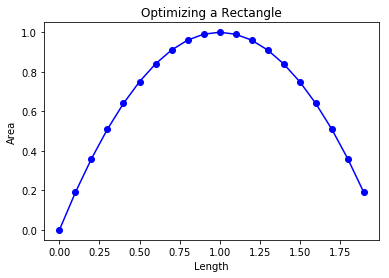

In [3]:
L_range = np.arange(0, 2, 0.1)
W_range = W(L_max, L_range)

plt.plot(L_range, L_range*W_range, 'b-o')
plt.title('Optimizing a Rectangle')
plt.xlabel('Length')
plt.ylabel('Area')
plt.show()

The above result clearly indicates that the ratio to get the maximum area is for `length:width = 1:1`, or a square.

**Solution 2**. *Analytic Solution.* 

Using calculus, the solution is more straightforward and general. Again, we start by noting that the cost function to be maximized is the area $A=l w$; by imposing the constraint for $w= \frac{P-2l}{2} $ with $P= constant$, the cost function is now:

\begin{equation}
A=l\frac{P-2l}{2}= \frac{Pl}{2} - l^2
\end{equation}

equating the derivative of $A$ wrt $l$ to zero will yield:


\begin{equation}
\frac{dA}{dl} =\frac{P}{2} - 2 l =0.
\end{equation}

Hence, $l=P/4$ and $w =\frac{P-2l}{2}= P/4$. Therefore, the maximum area for a rectangle with perimeter P is $P^2/16$ and the ratio of $l:w$ is $l=w$ or 1:1. Note that $\frac{d^2A}{dl^2} = -2 <0$, indicative that the optimal relation produced a maximum area $A$.

### Newton's Method (for optimization) in 1-D

The basic idea behind Newton's method (as well as Gradient Descent) is to start with an initial guess $x_k$ and to iteratively refine the guess $x_{k+1} = x_k + h$ so that it moves closer to the actual minimum. In other words, we wish to find some $h$, such that:

\begin{equation}
    f(x_{k+1}) = f(x_k + h) < f(x_k)
\end{equation}

Newton's method uses a local quadratic approximation of the objective function obtained via a truncated Taylor series expansion:

\begin{equation}
    f(x_k + h) \approx f(x_k) + f'(x_k)h + \frac{1}{2}f''(x_k)h^2
\end{equation}

We then use differentiation to find the minimum of this quadratic function of $h$ (note that in this case, $h$ is our variable and we treat $x_k$ as a constant):

\begin{align*}
    f'(x_k + h) &= 0\\
    f'(x_k) + f''(x_k)h &= 0\\
    h &= -\frac{f'(x_k)}{f''(x_k)}
\end{align*}

Thus, the iterative scheme for finding the minimum of $f(x)$ is given by the following algorithm:
    
1. Initialize a guess $x_k$

2. For $k = 0, 1, 2, \ldots$, calculate $x_{k+1} = x_{k} -\frac{f'(x_{k})}{f''(x_{k})}$

3. Terminate when tolerance is met

#### Example 1.

Suppose we wish to minimize the function:

\begin{equation}
    f(x) = 0.5 - xe^{-x^2}
\end{equation}

We calculate the first and second derivatives:

\begin{align*}
    f'(x) &= (2x^2 - 1)e^{-x^2}\\
    f''(x) &= 2x(3 - 2x^2)e^{-x^2}
\end{align*}

The Newton iteration is then given by:

\begin{equation}
    x_{k+1} = x_k - \frac{2x_k^2 - 1}{2x_k(3 - 2x_k^2)}
\end{equation}

In [7]:
# Newton's method implementation

def f(x):
    return 0.5 - x*np.exp(-x**2)

x_k = 1 #arbitrary set to 1 to keep it simple
for k in range(0, 6):
    print("k = %d --" %k,"-- x_k = %.6f --" %x_k, "-- f(x_k) = %.6f" %f(x_k))
    x_k = x_k - (2*x_k**2 - 1)/(2*x_k*(3 - 2*x_k**2))

k = 0 -- -- x_k = 1.000000 -- -- f(x_k) = 0.132121
k = 1 -- -- x_k = 0.500000 -- -- f(x_k) = 0.110600
k = 2 -- -- x_k = 0.700000 -- -- f(x_k) = 0.071162
k = 3 -- -- x_k = 0.707072 -- -- f(x_k) = 0.071118
k = 4 -- -- x_k = 0.707107 -- -- f(x_k) = 0.071118
k = 5 -- -- x_k = 0.707107 -- -- f(x_k) = 0.071118


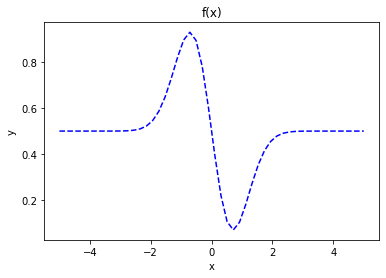

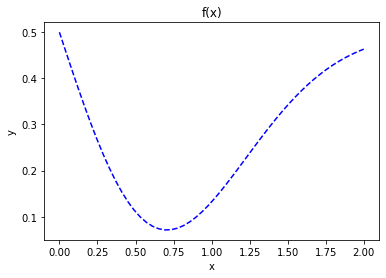

In [6]:
x = np.linspace(-5, 5, 50)

plt.plot(x, f(x), 'b--')
plt.title("f(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

x = np.linspace(0, 2, 50)

plt.plot(x, f(x), 'b--')
plt.title("f(x)")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We make note that if the initial guess is "too far", then the method may fail to converge, or it may converge to a maximum or inflection point. In some settings (like machine learning), one method to get around this is to try different initial guesses.

### Gradient Descent in 1-D

Suppose that calculating the second derivative of our objective function $f''(x)$ is difficult or not feasible. We can use a first-order approximation called the Gradient Descent method (also called Steepest Descent).

The algorithm is as follows:

1. Initialize a guess $x_k$

2. For $k = 0, 1, 2, \ldots$, calculate $x_{k+1} = x_{k} - \alpha f'(x_{k})$

3. Terminate when tolerance is met
    
Here, $\alpha$ is a hyperparameter called the learning rate.

#### Example 1.

Suppose we wish to minimize the function:

\begin{equation}
    f(x) = 0.5 - xe^{-x^2}
\end{equation}

We calculate the first derivative:

\begin{align*}
    f'(x) = (2x^2 - 1)e^{-x^2}
\end{align*}

The GD iteration with learning rate $\alpha$ is then given by:

\begin{equation}
    x_{k+1} = x_k - \alpha (2x_k^2 - 1)e^{-x_k^2}
\end{equation}

In [14]:
# Gradient descent implementation

def f(x):
    return 0.5 - x*np.exp(-x**2)

x_k = 1 #arbitrary set to 1 to keep it simple
alpha = 0.05
print('alpha = %.2f' %alpha)
for k in range(0, 100):
    print("k = %d --" %k,"-- x_k = %.6f --" %x_k, "-- f(x_k) = %.6f" %f(x_k))
    x_k = x_k - alpha*(2*x_k**2 - 1)*np.exp(-x_k**2)

alpha = 0.05
k = 0 -- -- x_k = 1.000000 -- -- f(x_k) = 0.132121
k = 1 -- -- x_k = 0.950000 -- -- f(x_k) = 0.114723
k = 2 -- -- x_k = 0.909750 -- -- f(x_k) = 0.102369
k = 3 -- -- x_k = 0.876985 -- -- f(x_k) = 0.093580
k = 4 -- -- x_k = 0.850075 -- -- f(x_k) = 0.087310
k = 5 -- -- x_k = 0.827812 -- -- f(x_k) = 0.082822
k = 6 -- -- x_k = 0.809285 -- -- f(x_k) = 0.079599
k = 7 -- -- x_k = 0.793791 -- -- f(x_k) = 0.077277
k = 8 -- -- x_k = 0.780780 -- -- f(x_k) = 0.075600
k = 9 -- -- x_k = 0.769819 -- -- f(x_k) = 0.074385
k = 10 -- -- x_k = 0.760557 -- -- f(x_k) = 0.073503
k = 11 -- -- x_k = 0.752712 -- -- f(x_k) = 0.072862
k = 12 -- -- x_k = 0.746054 -- -- f(x_k) = 0.072394
k = 13 -- -- x_k = 0.740395 -- -- f(x_k) = 0.072053
k = 14 -- -- x_k = 0.735576 -- -- f(x_k) = 0.071804
k = 15 -- -- x_k = 0.731469 -- -- f(x_k) = 0.071621
k = 16 -- -- x_k = 0.727964 -- -- f(x_k) = 0.071487
k = 17 -- -- x_k = 0.724971 -- -- f(x_k) = 0.071389
k = 18 -- -- x_k = 0.722413 -- -- f(x_k) = 0.071318
k = 19 --

### Gradient Descent in n-dimensions

We can generalize the methods we've discussed so far to work in higher dimensions. Specifically, when our objective function $f(\mathbf{x})$ is now a function of multiple variables, i.e. $f: \mathbb{R}^n \rightarrow \mathbb{R}$.

When this is the case, the "first derivative" of $f$ becomes a vector-valued function $\nabla f: \mathbb{R}^n \rightarrow \mathbb{R}^n$ defined by

\begin{equation}
    \nabla f(\mathbf{x}) = \nabla f(x_1, x_2, \ldots, x_n) = \begin{bmatrix}
        \frac{\partial f(\mathbf{x})}{\partial x_1}\\
        \frac{\partial f(\mathbf{x})}{\partial x_2}\\
        \vdots\\
        \frac{\partial f(\mathbf{x})}{\partial x_n}
    \end{bmatrix}
\end{equation}

We call this the <i>gradient</i> of $f$.

The algorithm for the n-dimensional case is as follows:
    
1. Initialize a guess $\mathbf{x}_k$ (now a vector)

2. For $k = 0, 1, 2, \ldots$, calculate $\mathbf{x}_{k+1} = \mathbf{x}_{k} - \alpha \nabla f(\mathbf{x}_{k})$ (also a vector)

3. Terminate when tolerance is met

#### Example 1.

Suppose we wish to minimize the function:

\begin{equation}
    f(\mathbf{x}) = 0.5x_1^2 + 2.5x_2^2
\end{equation}

We calculate the gradient:

\begin{equation}
    \nabla f(\mathbf{x}) = \begin{bmatrix}
        x_1\\
        5x_2
    \end{bmatrix}
\end{equation}

The GD iteration with learning rate $\alpha$ is then given by:

\begin{equation}
    \mathbf{x}_{k+1} = \mathbf{x}_k - \alpha \begin{bmatrix}
        x_1\\
        5x_2
    \end{bmatrix}
\end{equation}

In [39]:
# Gradient descent n-dim implementation

def f(x):
    return 0.5*x[0]**2 + 2.5*x[1]**2

x_k = np.array([5, 1])
alpha = 1/3
print('alpha = %.2f' %alpha)
for k in range(0, 50):
    print("k = %d --" %k,"-- x_k[0] = %.6f --" %x_k[0],"-- x_k[1] = %.6f --" %x_k[1], "-- f(x_k) = %.6f" %f(x_k))
    x_k = x_k - alpha*np.array([x_k[0], 5*x_k[1]])

alpha = 0.33
k = 0 -- -- x_k[0] = 5.000000 -- -- x_k[1] = 1.000000 -- -- f(x_k) = 15.000000
k = 1 -- -- x_k[0] = 3.333333 -- -- x_k[1] = -0.666667 -- -- f(x_k) = 6.666667
k = 2 -- -- x_k[0] = 2.222222 -- -- x_k[1] = 0.444444 -- -- f(x_k) = 2.962963
k = 3 -- -- x_k[0] = 1.481481 -- -- x_k[1] = -0.296296 -- -- f(x_k) = 1.316872
k = 4 -- -- x_k[0] = 0.987654 -- -- x_k[1] = 0.197531 -- -- f(x_k) = 0.585277
k = 5 -- -- x_k[0] = 0.658436 -- -- x_k[1] = -0.131687 -- -- f(x_k) = 0.260123
k = 6 -- -- x_k[0] = 0.438957 -- -- x_k[1] = 0.087791 -- -- f(x_k) = 0.115610
k = 7 -- -- x_k[0] = 0.292638 -- -- x_k[1] = -0.058528 -- -- f(x_k) = 0.051382
k = 8 -- -- x_k[0] = 0.195092 -- -- x_k[1] = 0.039018 -- -- f(x_k) = 0.022837
k = 9 -- -- x_k[0] = 0.130061 -- -- x_k[1] = -0.026012 -- -- f(x_k) = 0.010150
k = 10 -- -- x_k[0] = 0.086708 -- -- x_k[1] = 0.017342 -- -- f(x_k) = 0.004511
k = 11 -- -- x_k[0] = 0.057805 -- -- x_k[1] = -0.011561 -- -- f(x_k) = 0.002005
k = 12 -- -- x_k[0] = 0.038537 -- -- x_k[1